<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-16 11:07:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.1MB/s    in 3.2s    

2025-07-16 11:07:35 (46.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



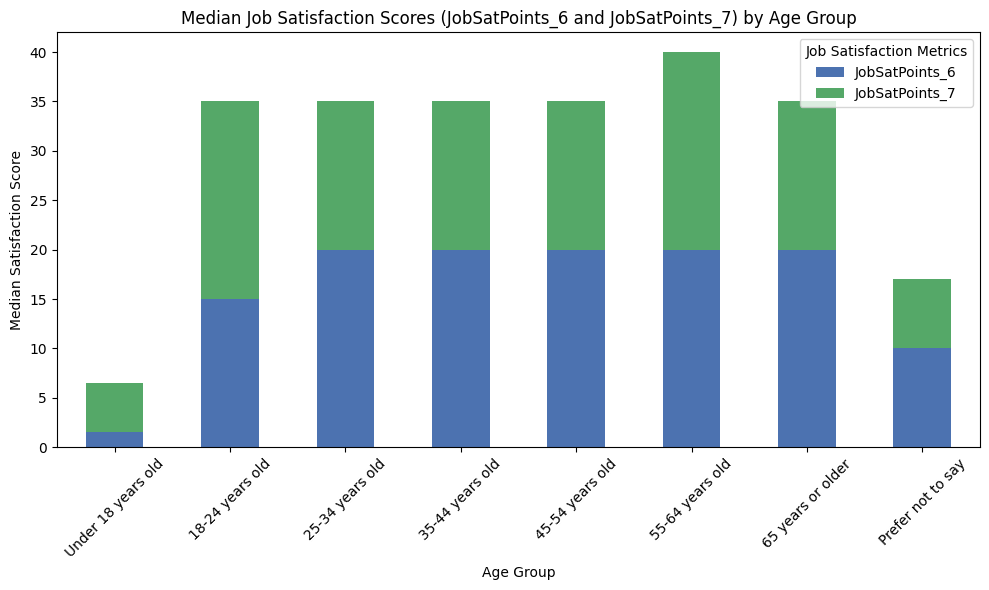

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Select relevant columns and drop rows with missing values in JobSatPoints_6 or JobSatPoints_7
df_clean = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Convert job satisfaction columns to numeric (they might be floats, but just in case)
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean['JobSatPoints_7'] = pd.to_numeric(df_clean['JobSatPoints_7'], errors='coerce')

# Group by Age and calculate median of JobSatPoints_6 and JobSatPoints_7
median_scores = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort age groups in a logical order (optional)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
median_scores = median_scores.reindex(age_order).dropna()

# Plot stacked bar chart
ax = median_scores.plot(kind='bar', stacked=True, figsize=(10,6), color=['#4c72b0', '#55a868'])
plt.title('Median Job Satisfaction Scores (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_740/654169169.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


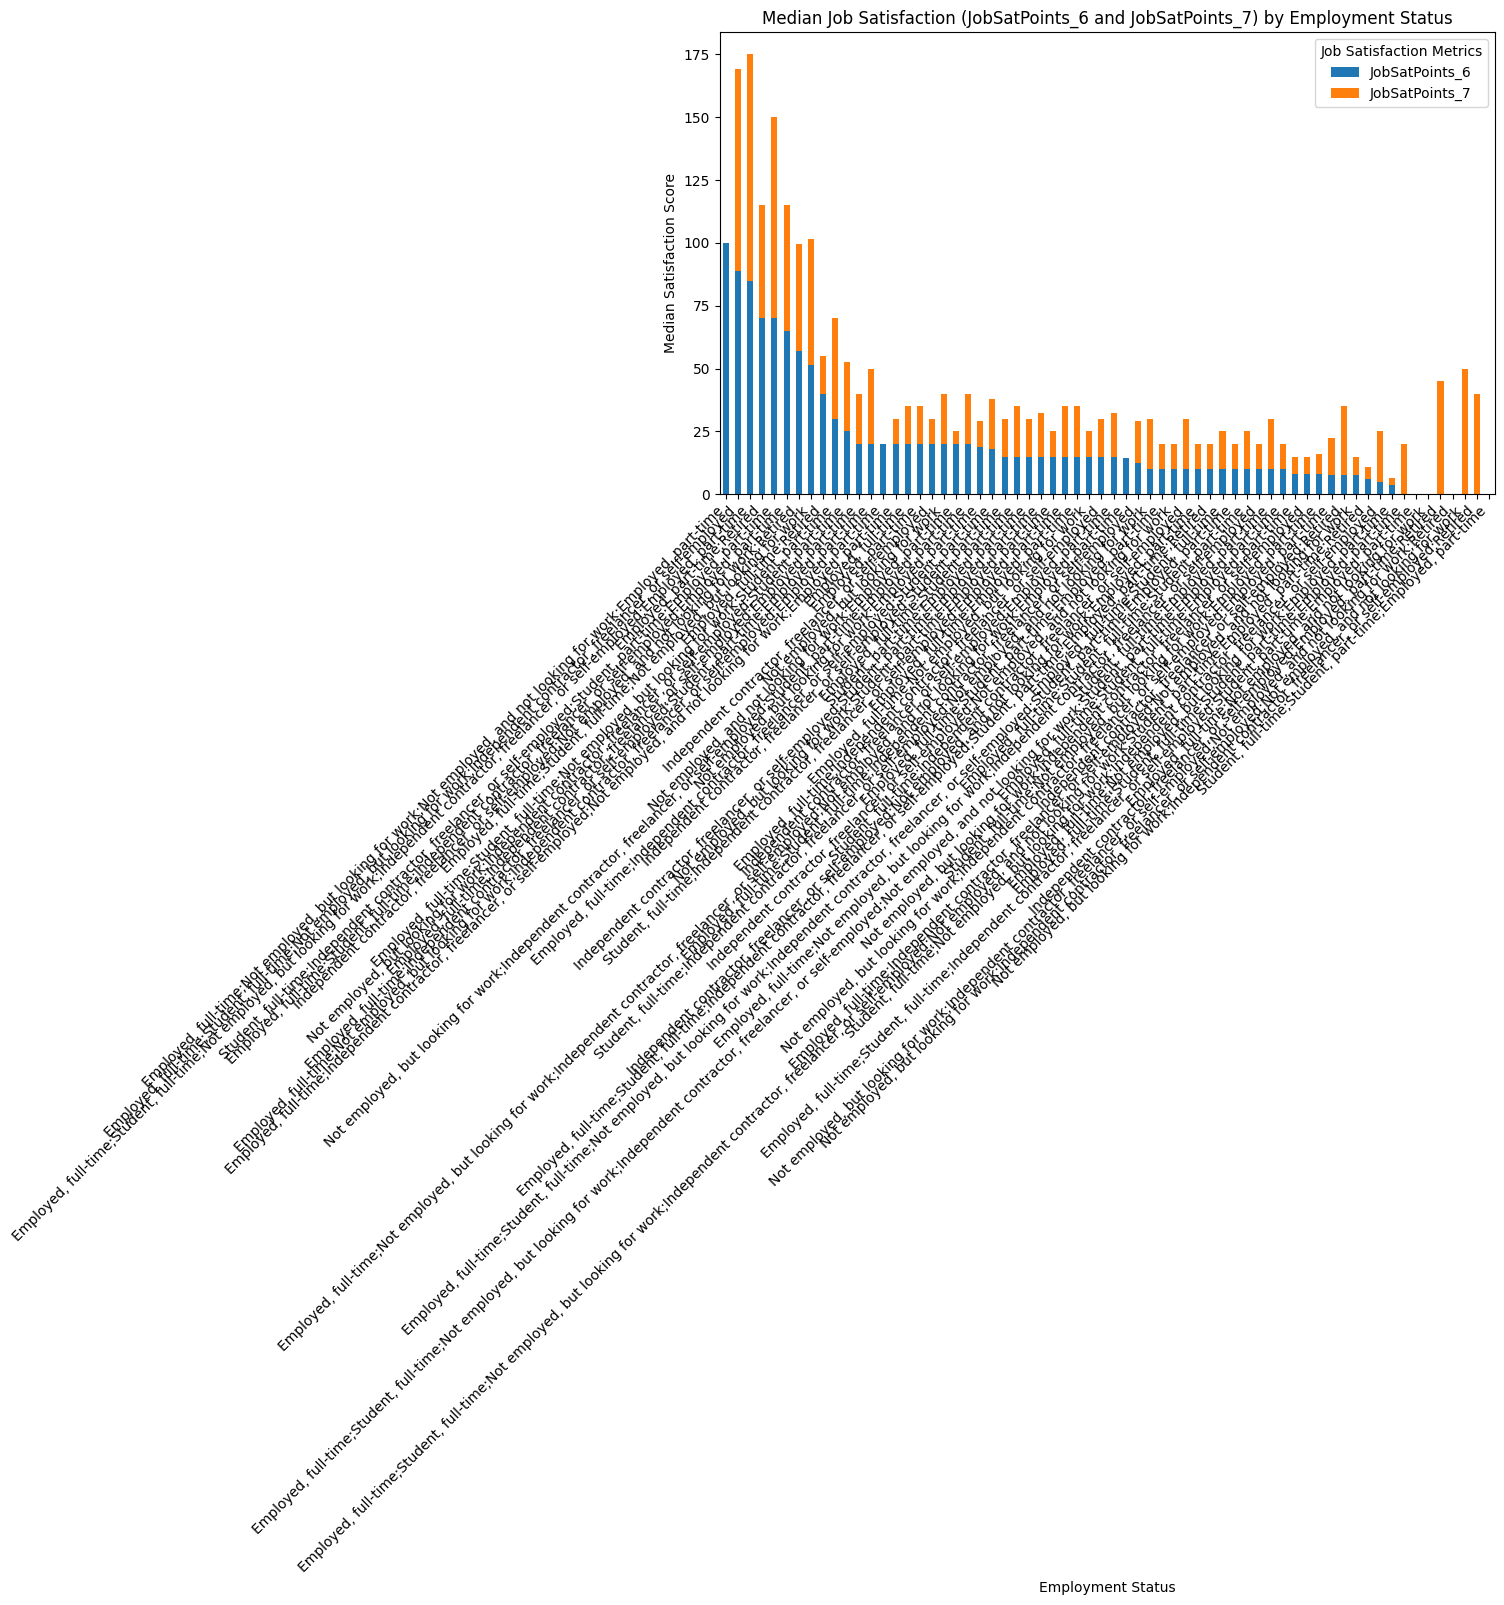

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Select relevant columns and drop rows with missing job satisfaction or employment status
df_clean = df[['Employment', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Convert job satisfaction columns to numeric, just to be safe
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean['JobSatPoints_7'] = pd.to_numeric(df_clean['JobSatPoints_7'], errors='coerce')

# Group by Employment and compute median satisfaction scores
median_scores = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort by median of JobSatPoints_6 for better visualization (optional)
median_scores = median_scores.sort_values(by='JobSatPoints_6', ascending=False)

# Plot stacked bar chart
ax = median_scores.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])
plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


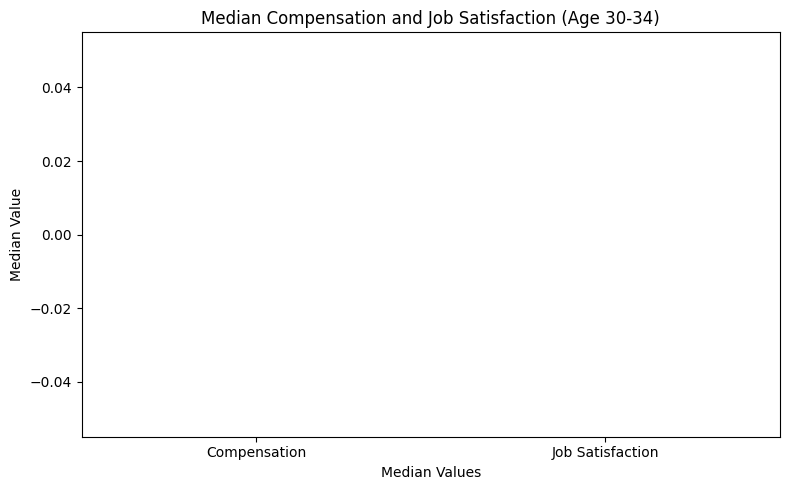

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Filter for age group 30 to 35
# Note: Age column has string ranges like '30-34 years old', '35-44 years old'
# We'll include '30-34 years old' and '35-44 years old' but only keep those with age 30-35 by filtering years in numeric form
# Or we can simply keep both age groups as a close approximation

# Let’s first filter for rows with age between 30 and 35 approx:
valid_ages = ['30-34 years old', '35-44 years old']  # Including 35-44 but will later filter for <=35
age_filtered = df[df['Age'].isin(valid_ages)].copy()

# Convert compensation and job satisfaction to numeric
age_filtered['ConvertedCompYearly'] = pd.to_numeric(age_filtered['ConvertedCompYearly'], errors='coerce')
age_filtered['JobSatPoints_6'] = pd.to_numeric(age_filtered['JobSatPoints_6'], errors='coerce')

# Further filter only respondents where age approx between 30 and 35:
# We don't have exact ages, so just include '30-34 years old' group as the closest
age_filtered = age_filtered[age_filtered['Age'] == '30-34 years old']

# Drop NA values
age_filtered = age_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Calculate median compensation and job satisfaction
median_comp = age_filtered['ConvertedCompYearly'].median()
median_jobsat = age_filtered['JobSatPoints_6'].median()

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'Median Values': ['Compensation', 'Job Satisfaction'],
    'Median Score': [median_comp, median_jobsat]
})

# Plot stacked bar chart (though it's just two bars here)
fig, ax = plt.subplots(figsize=(8, 5))
plot_df.set_index('Median Values')['Median Score'].plot(kind='bar', stacked=True, color=['#4C72B0', '#55A868'])

plt.title('Median Compensation and Job Satisfaction (Age 30-34)')
plt.ylabel('Median Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_740/3892356549.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_740/3892356549.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_data = df_filtered.groupby('Age').agg({


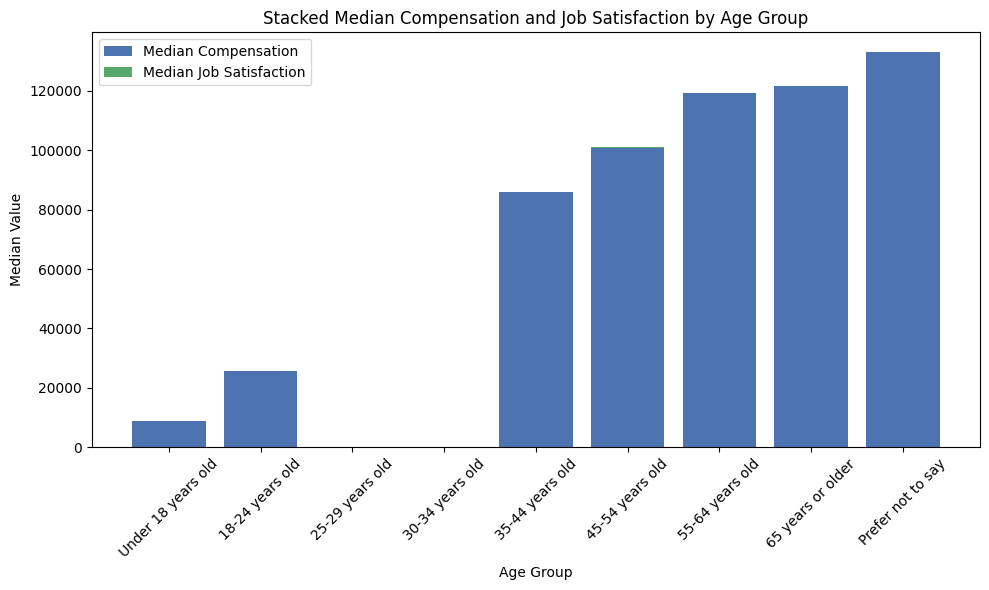

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Define valid age groups in order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-29 years old',
    '30-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Filter data for valid ages only and non-null compensation & satisfaction
df_filtered = df[
    df['Age'].isin(age_order) & 
    df['ConvertedCompYearly'].notna() & 
    df['JobSatPoints_6'].notna()
]

# Make Age categorical with the specified order
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Group and get median values
median_data = df_filtered.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(median_data['Age'], median_data['ConvertedCompYearly'], label='Median Compensation', color='#4C72B0')
ax.bar(median_data['Age'], median_data['JobSatPoints_6'], bottom=median_data['ConvertedCompYearly'], 
       label='Median Job Satisfaction', color='#55A868')

ax.set_xlabel('Age Group')
ax.set_ylabel('Median Value')
ax.set_title('Stacked Median Compensation and Job Satisfaction by Age Group')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {
    'Age Group': ['18-25', '18-25', '18-25', '26-35', '26-35', '26-35', '36-45', '36-45', '36-45'],
    'Database': ['MySQL', 'PostgreSQL', 'MongoDB', 'MySQL', 'PostgreSQL', 'MongoDB', 'MySQL', 'PostgreSQL', 'MongoDB'],
    'Count': [40, 30, 20, 35, 25, 40, 20, 30, 50]
}

df = pd.DataFrame(data)

# Pivot to get Age Groups as index and Databases as columns
pivot_df = df.pivot(index='Age Group', columns='Database', values='Count')

# Normalize counts to proportions for better visual comparison (optional)
pivot_df_prop = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plot stacked bar chart
pivot_df_prop.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

plt.title('Preferred Databases by Age Group (Proportional)')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [ ]:
##Write your code here

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [ ]:
##Write your code here

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
